# Курс орнитологии

1. Реализуйте модель для извлечения признаков из голоса птиц. За основу можно брать:
   - преобразование в аудиофичи (например как mfcc в лекции. Конкретно это преобразование использовать нельзя)
   - обученные поверх аудиофич ML модели
  
1. С помощью модели и одного из предложенных датасетов создайте эмбеддинги пения птиц. Создайте эмбеддинги нескольких записей каждого вида птиц. Визуализируйте эмбеддинги. Для визуализации рекомендуется использовать подмножество видов птиц

1. Аргументируйте почему ваша модель хорошо извлекает признаки из аудио. 
    - Покажите кластеризацию эмбеддингов по видам

1. С помощью эмбеддингов найдите похожие по звучанию виды птиц. Выведите примеры их пения в ноутбуке.



Датасеты:
1. [Датасет](https://www.kaggle.com/vinayshanbhag/bird-song-data-set) американских птиц
1. Почищенный от фонового шума BirdCall [датасет](https://www.kaggle.com/luisblanche/birdcall-singing-3)
1. [Датасет](https://www.kaggle.com/luisblanche/birdcall-singing-0) BirdCall часть 1

In [31]:
! pip install librosa
! pip install soundfile
! pip3 install torchaudio

In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display as librosa_display
import torchaudio
import torch

In [3]:
birds = pd.read_csv('bird_songs_metadata.csv')

In [4]:
birds.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [5]:
birds = birds[['id', 'name', 'filename']]

In [6]:
import matplotlib.pyplot as plt

(array([ 893.,    0., 1182.,    0.,    0., 1017.,    0., 1256.,    0.,
        1074.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

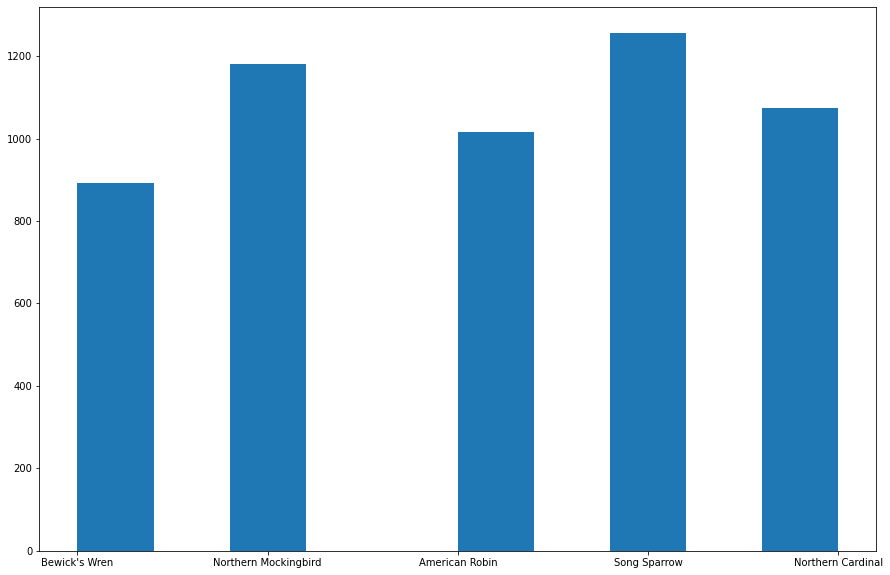

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(birds['name'])

In [8]:
import pickle
from pathlib import Path

In [9]:
path = Path('wavfiles')

Характеристики цветности - это мощное представление музыкального звука, в котором мы используем 12-элементное представление спектральной энергии, называемое вектором цветности, где каждый из 12 интервалов представляет 12 классов высоты звука с одинаковым темпом для музыки западного типа (интервал между полутонами). Его можно вычислить из логарифмического кратковременного преобразования Фурье входного звукового сигнала, также называемого хроматограммой или профилем класса основного тона. 

Другой особенностью, основанной на цветности, является нормализованная статистика распределения энергии цветности (CENS), которая обычно используется для выявления сходства между различными интерпретациями данной музыки. Основная идея CENS заключается в том, что сбор статистики по большим окнам аудиофайла сглаживает локальные отклонения в темпе, артикуляции и музыкальном оформлении. CENS обычно реализуются для задач сопоставления звука и подобия.

In [38]:
import os
from tqdm import tqdm

# загрузим датасет небольших речей 6 разных спикеров

speechs = []
for file_name in tqdm(birds['filename']):
    path_ = path / file_name
    
    wave, sample_rate = librosa.load(path_)
    wave, _ = librosa.effects.trim(wave)
    feature = librosa.feature.chroma_cens(y=wave, sr=sample_rate)
    speechs.append(feature)

with open("speechs.txt", "wb") as fp:   #Pickling
    pickle.dump(speechs, fp)

 12%|█▏        | 628/5422 [02:18<17:35,  4.54it/s]c:\python39\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
 19%|█▉        | 1042/5422 [03:51<16:29,  4.43it/s]c:\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1010
  warnings.warn(
 42%|████▏     | 2261/5422 [08:33<16:33,  3.18it/s]c:\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(
 53%|█████▎    | 2874/5422 [10:53<05:56,  7.14it/s]c:\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=960
  warnings.warn(
 58%|█████▊    | 3133/5422 [11:52<05:20,  7.14it/s]c:\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of 

In [10]:
with open("speechs.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [57]:
len(b[0][0])

130

In [11]:
speechs = b

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_clf = KNeighborsClassifier()

In [14]:
names = list(set(birds['name']))

In [15]:
names

['Northern Cardinal',
 "Bewick's Wren",
 'Northern Mockingbird',
 'American Robin',
 'Song Sparrow']

In [16]:
birds['name_id'] = birds['name'].apply(lambda x: names.index(x))

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(speechs, birds['name'], random_state=42, test_size=0.2)

In [18]:
birds['speechs'] = speechs

In [19]:
birds['speechs'] = birds['speechs'].apply(lambda x: x.reshape(np.product(x.shape)))

In [20]:
birds['len'] = birds['speechs'].apply(lambda x: len(x))

In [21]:
birds = birds[birds['len'] == 1560]

In [22]:
from sklearn.utils import shuffle
birds = shuffle(birds)

In [23]:
type(birds['speechs'][1:10])

pandas.core.series.Series

In [24]:
birds['name_id']

4961    0
1904    2
4398    0
432     1
3653    4
       ..
821     1
3265    4
907     2
4093    4
1398    2
Name: name_id, Length: 5413, dtype: int64

In [27]:
knn_clf.fit(birds['speechs'].tolist(),birds['name_id'].tolist()) 

KNeighborsClassifier()

In [28]:
import umap

embs = umap.UMAP().fit_transform(birds['speechs'][:10].tolist())

c:\python39\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


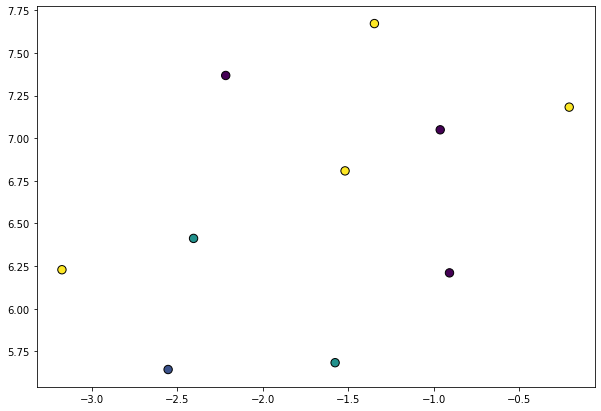

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'][:10], s=70, edgecolor="k")
plt.show()

In [30]:
# Incorrect number of clusters
y_pred = knn_clf.predict(birds['speechs'][:10].tolist())

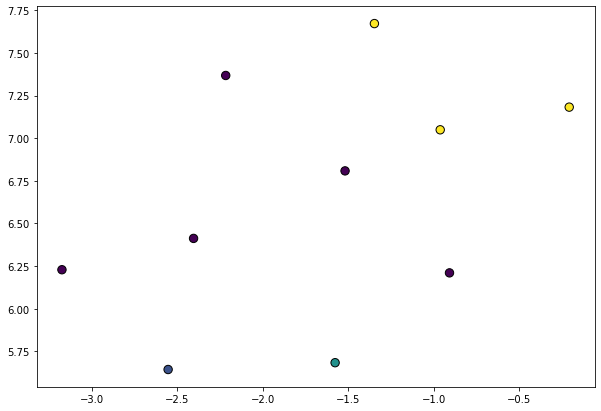

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

In [32]:
from sklearn.cluster import KMeans

In [33]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(birds['speechs'].tolist())

In [34]:
embs = umap.UMAP().fit_transform(birds['speechs'].tolist())

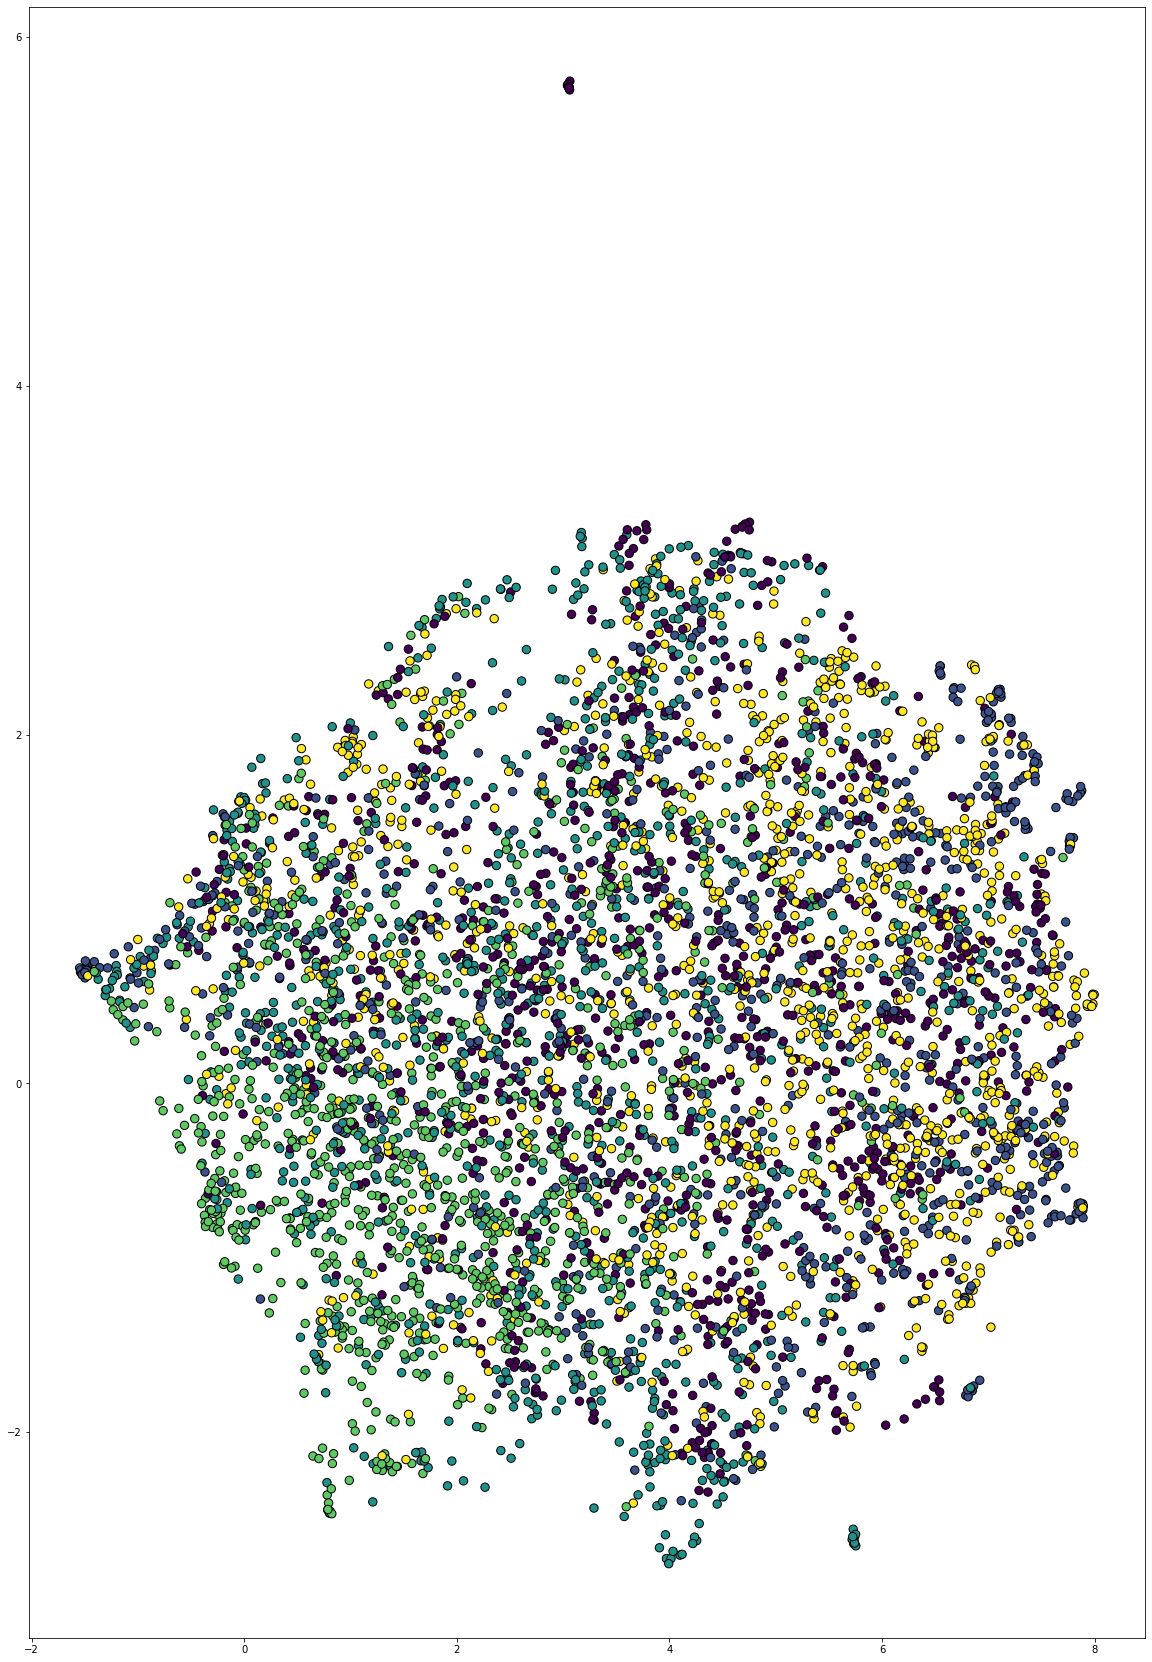

In [35]:
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=birds['name_id'], s=70, edgecolor="k")
plt.show()

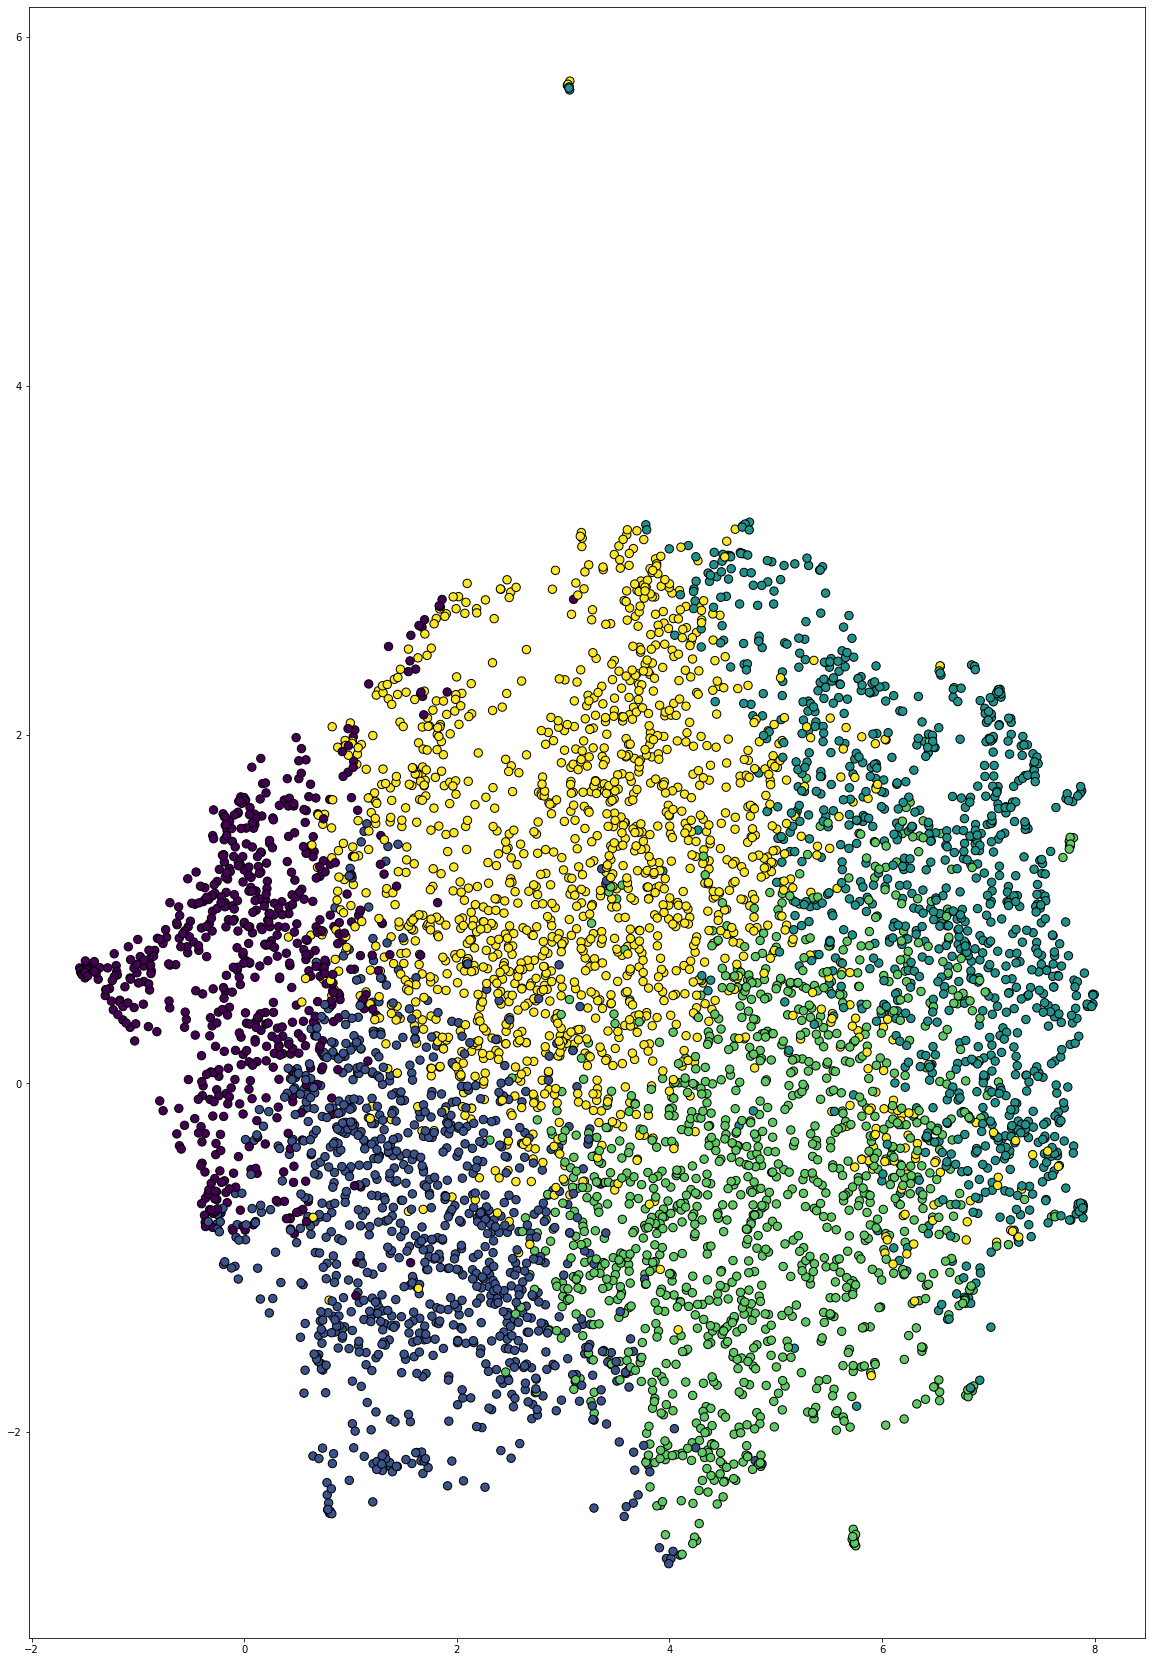

In [36]:
plt.figure(figsize=(20,30))
plt.scatter(embs[:, 0], embs[:, 1], c=y_pred, s=70, edgecolor="k")
plt.show()

In [37]:
from scipy.spatial.distance import cdist

In [38]:
#birds['speechs_lin'] = torch.tensor(birds['speechs_lin'])

In [39]:
query = birds.loc[10]

In [40]:
query

id                                                     557838
name                                            Bewick's Wren
filename                                        557838-17.wav
name_id                                                     1
speechs     [0.2305372661146904, 0.2305405653887818, 0.230...
len                                                      1560
Name: 10, dtype: object

In [41]:
import IPython

In [42]:
IPython.display.Audio(path / query['filename'])

In [43]:
birds

,id,name,filename,name_id,speechs,len
4961,302932,Northern Cardinal,302932-1.wav,0,"[0.09385526706109953, 0.0980126320832605, 0.10...",1560
1904,54019,Northern Mockingbird,54019-4.wav,2,"[0.34453717135758083, 0.33963971029779405, 0.3...",1560
4398,560427,Northern Cardinal,560427-5.wav,0,"[0.2830334817995055, 0.2789391703171025, 0.275...",1560
432,269166,Bewick's Wren,269166-1.wav,1,"[0.25950627641136387, 0.2563993872125675, 0.25...",1560
3653,306748,Song Sparrow,306748-14.wav,4,"[0.29498062469200514, 0.29738679567036325, 0.2...",1560
...,...,...,...,...,...,...
821,61472,Bewick's Wren,61472-10.wav,1,"[0.1650275657287241, 0.16435480158389845, 0.16...",1560
3265,480068,Song Sparrow,480068-6.wav,4,"[0.1471001516037876, 0.1429356585183163, 0.138...",1560
907,563125,Northern Mockingbird,563125-14.wav,2,"[0.2001508807714097, 0.20231150052246838, 0.20...",1560
4093,111670,Song Sparrow,111670-14.wav,4,"[0.2655227118221194, 0.26541650050765897, 0.26...",1560


In [44]:
birds.loc[0]

id                                                     557838
name                                            Bewick's Wren
filename                                         557838-0.wav
name_id                                                     1
speechs     [0.22453869088539227, 0.22494374087807, 0.2253...
len                                                      1560
Name: 0, dtype: object

In [45]:
import sklearn
def find_simmilar(query):
    birds['MSE'] = birds.apply(lambda bird: sklearn.metrics.mean_squared_error(bird['speechs'], query['speechs']), axis=1)

In [46]:
find_simmilar(query)

In [47]:
birds.sort_values(by=['MSE'], ascending=True, inplace=True)

In [48]:
birds.head(10)

,id,name,filename,name_id,speechs,len,MSE
10,557838,Bewick's Wren,557838-17.wav,1,"[0.2305372661146904, 0.2305405653887818, 0.230...",1560,0.000000
0,557838,Bewick's Wren,557838-0.wav,1,"[0.22453869088539227, 0.22494374087807, 0.2253...",1560,0.000487
1877,57040,Northern Mockingbird,57040-9.wav,2,"[0.22180635938210586, 0.22221486403411103, 0.2...",1560,0.008985
993,541496,Northern Mockingbird,541496-8.wav,2,"[0.35664154649481467, 0.3533071146470416, 0.34...",1560,0.010841
992,541496,Northern Mockingbird,541496-7.wav,2,"[0.23611463672081048, 0.2353979020363294, 0.23...",1560,0.010920
2295,464766,American Robin,464766-14.wav,3,"[0.22371946006729895, 0.22570466223091298, 0.2...",1560,0.011225
4,557838,Bewick's Wren,557838-6.wav,1,"[0.2318111682618879, 0.2319182008855577, 0.231...",1560,0.011500
1,557838,Bewick's Wren,557838-1.wav,1,"[0.07495413423220985, 0.08262761908604573, 0.0...",1560,0.011512
1991,18484,Northern Mockingbird,18484-1.wav,2,"[0.20433576210335896, 0.20195732093614296, 0.2...",1560,0.011680
1873,57040,Northern Mockingbird,57040-5.wav,2,"[0.17521770148471455, 0.1803890551865302, 0.18...",1560,0.011894


In [49]:
ans = birds.iloc[2]

In [50]:
ans

id                                                      57040
name                                     Northern Mockingbird
filename                                          57040-9.wav
name_id                                                     2
speechs     [0.22180635938210586, 0.22221486403411103, 0.2...
len                                                      1560
MSE                                                  0.008985
Name: 1877, dtype: object

In [51]:
IPython.display.Audio(path / ans['filename'])

In [52]:
ans = birds.iloc[3]
IPython.display.Audio(path / ans['filename'])

In [53]:
ans = birds.iloc[5]
IPython.display.Audio(path / ans['filename'])